In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ast
from itertools import zip_longest

In [43]:
def get_llm_ratings(llm_rating_sources: list[str], question = "1") -> dict[str, float]:
    llm_ratings = {}

    all_ratings = {}
    for source in llm_rating_sources:
        source = f"{os.path.dirname(os.path.abspath(os.getcwd()))}/../outputs/{source}"
        
        # Traverse through the directory to find CSV files
        for root, _, files in os.walk(source):
            for file in files:
                if file.endswith(".csv"):
                    # Read the CSV file
                    file_path = os.path.join(root, file)
                    df = pd.read_csv(file_path)
                    
                    # Assuming the response column contains the dictionary of ratings as string
                    for index, row in df.iterrows():
                        name = row['experiment_name'] + ", " + row['version']
                        response = row["response"]
                        
                        response = ast.literal_eval(response)
                        
                        rating = 0
                        if question in response:
                            rating = response[question]
                        else:
                            print("in else block")
                            continue

                        if name not in all_ratings:
                            all_ratings[name] = []
                        if rating:
                            all_ratings[name].append(rating)
                        else:
                            all_ratings[name].append(0)
                            print(name,"rating none")
    
    for key, value in all_ratings.items():
        llm_ratings[key] = sum(value) / len(value)
    
    return llm_ratings

In [3]:
human_ratings = { # Standard suspense / Q2 ratings
    "Experiment A, Pen Not Mentioned": (3.78 + 3.43) / 2,
    "Experiment A, Pen Mentioned Removed": (4.38 + 4.06) / 2,
    "Experiment A, Pen Mentioned Not Removed": 3.47,
    "Experiment B, Unused Comb": 3.96,
    "Experiment B, Used Comb": 3.41,
    "Experiment C, Prior Solution Not Mentioned": (3.76 + 3.34) / 2,
    "Experiment C, Prior Solution Mentioned and Removed": (4.61 + 3.99) / 2,
    "Experiment C, Prior Solution Mentioned Not Removed": 4.14
}
# human_ratings = { # Alternate suspense / Q2 ratings
#     "Experiment A, Pen Not Mentioned": 3.40,
#     "Experiment A, Pen Mentioned Removed": 3.95,
#     "Experiment A, Pen Mentioned Not Removed": 0, # n/a
#     "Experiment B, Unused Comb": 0, # n/a
#     "Experiment B, Used Comb": 0, # n/a
#     "Experiment C, Prior Solution Not Mentioned": 3.40,
#     "Experiment C, Prior Solution Mentioned and Removed": 3.91,
#     "Experiment C, Prior Solution Mentioned Not Removed": 0 # n/a
# }

In [18]:
llm_rating_sources = ["gerrig_experiment/adverserial_changing_tense/original_past_tense/standard"]
llm_ratings = get_llm_ratings(llm_rating_sources)
print(llm_ratings)

{'Experiment A, Pen Not Mentioned': 6.166666666666667, 'Experiment A, Pen Mentioned Removed': 6.176470588235294, 'Experiment A, Pen Mentioned Not Removed': 6.111111111111111, 'Experiment B, Unused Comb': 6.277777777777778, 'Experiment B, Used Comb': 6.235294117647059, 'Experiment C, Prior Solution Not Mentioned': 6.333333333333333, 'Experiment C, Prior Solution Mentioned and Removed': 6.388888888888889, 'Experiment C, Prior Solution Mentioned Not Removed': 6.235294117647059}


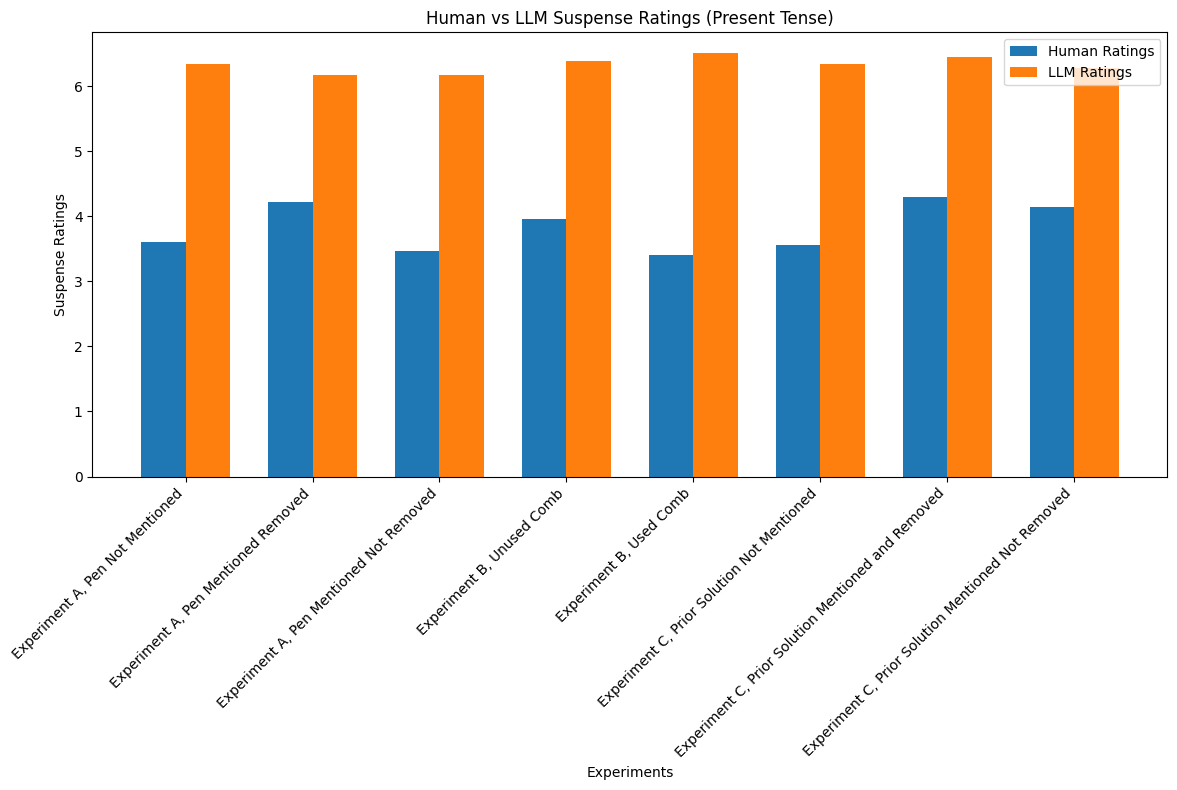

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
experiments = list(human_ratings.keys())
llm_values = [llm_ratings.get(exp, 0) for exp in experiments]
human_values = [human_ratings.get(exp, 0) for exp in experiments]

# Bar width and index positions
bar_width = 0.35
index = np.arange(len(experiments))

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Bars for human and LLM ratings
bars1 = ax.bar(index, human_values, bar_width, label='Human Ratings')
bars2 = ax.bar(index + bar_width, llm_values, bar_width, label='LLM Ratings')

# Labels and title
ax.set_xlabel('Experiments')
ax.set_ylabel('Suspense Ratings')
ax.set_title('Human vs LLM Suspense Ratings (Present Tense)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(experiments, rotation=45, ha='right', fontsize=10)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

In [11]:
llm_values_present = llm_values

In [12]:
llm_values_present

[6.333333333333333,
 6.166666666666667,
 6.166666666666667,
 6.388888888888889,
 6.5,
 6.333333333333333,
 6.444444444444445,
 6.277777777777778]

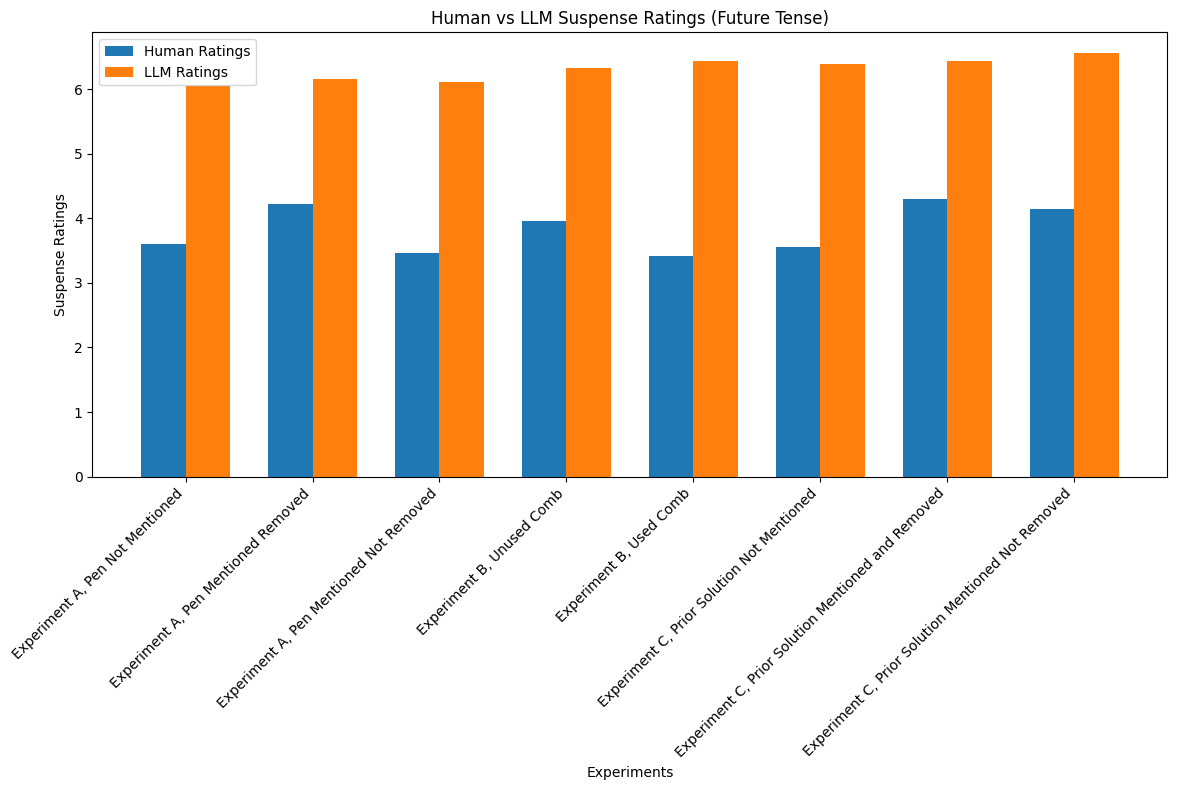

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
experiments = list(human_ratings.keys())
llm_values = [llm_ratings.get(exp, 0) for exp in experiments]
human_values = [human_ratings.get(exp, 0) for exp in experiments]

# Bar width and index positions
bar_width = 0.35
index = np.arange(len(experiments))

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Bars for human and LLM ratings
bars1 = ax.bar(index, human_values, bar_width, label='Human Ratings')
bars2 = ax.bar(index + bar_width, llm_values, bar_width, label='LLM Ratings')

# Labels and title
ax.set_xlabel('Experiments')
ax.set_ylabel('Suspense Ratings')
ax.set_title('Human vs LLM Suspense Ratings (Future Tense)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(experiments, rotation=45, ha='right', fontsize=10)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

In [7]:
llm_values_future = llm_values

In [8]:
llm_values_future

[6.055555555555555,
 6.166666666666667,
 6.111111111111111,
 6.333333333333333,
 6.444444444444445,
 6.388888888888889,
 6.444444444444445,
 6.555555555555555]

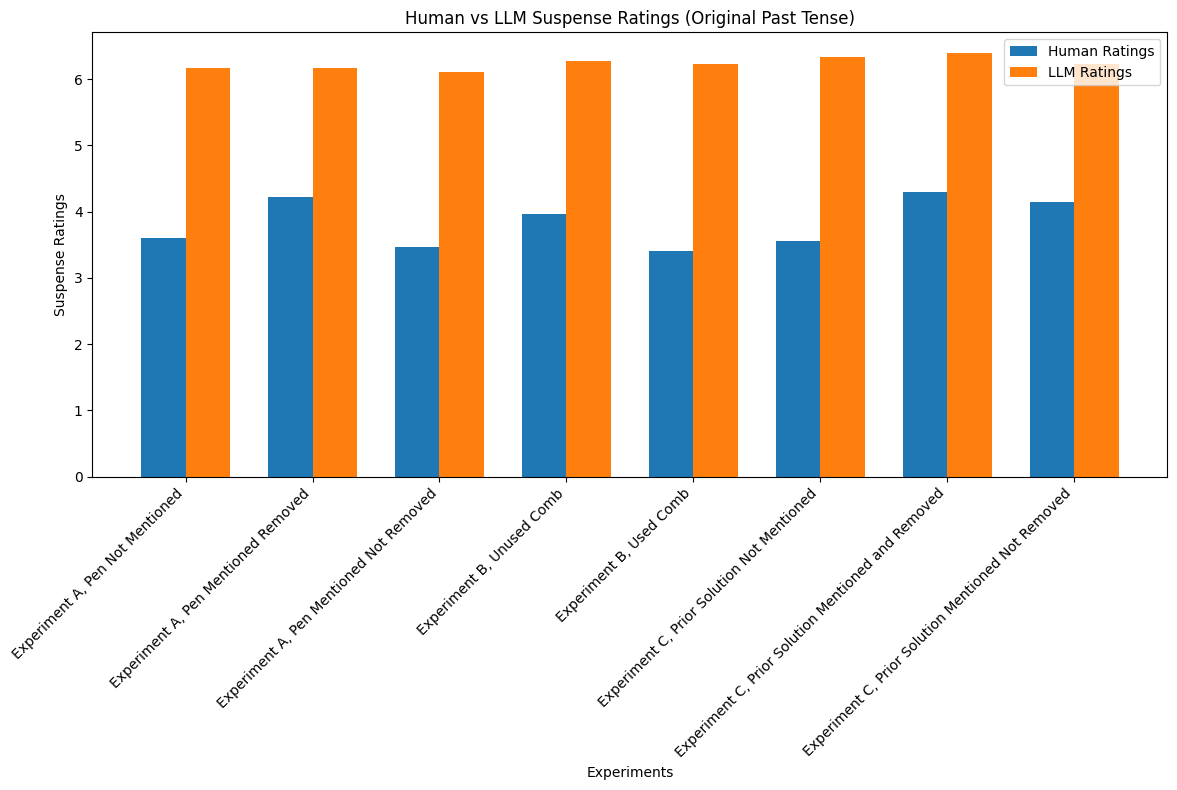

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
experiments = list(human_ratings.keys())
llm_values = [llm_ratings.get(exp, 0) for exp in experiments]
human_values = [human_ratings.get(exp, 0) for exp in experiments]

# Bar width and index positions
bar_width = 0.35
index = np.arange(len(experiments))

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Bars for human and LLM ratings
bars1 = ax.bar(index, human_values, bar_width, label='Human Ratings')
bars2 = ax.bar(index + bar_width, llm_values, bar_width, label='LLM Ratings')

# Labels and title
ax.set_xlabel('Experiments')
ax.set_ylabel('Suspense Ratings')
ax.set_title('Human vs LLM Suspense Ratings (Original Past Tense)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(experiments, rotation=45, ha='right', fontsize=10)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

In [22]:
experiments = list(human_ratings.keys())

llm_rating_sources = ["gerrig_experiment/adverserial_changing_tense/original_past_tense/standard"]
llm_ratings_past = get_llm_ratings(llm_rating_sources)
llm_values_past = [llm_ratings_past.get(exp, 0) for exp in experiments]

llm_rating_sources = ["gerrig_experiment/adverserial_changing_tense/present_tense/standard"]
llm_ratings_present = get_llm_ratings(llm_rating_sources)
llm_values_present = [llm_ratings_present.get(exp, 0) for exp in experiments]

llm_rating_sources = ["gerrig_experiment/adverserial_changing_tense/future_tense/standard"]
llm_ratings_future = get_llm_ratings(llm_rating_sources)
llm_values_future = [llm_ratings_future.get(exp, 0) for exp in experiments]

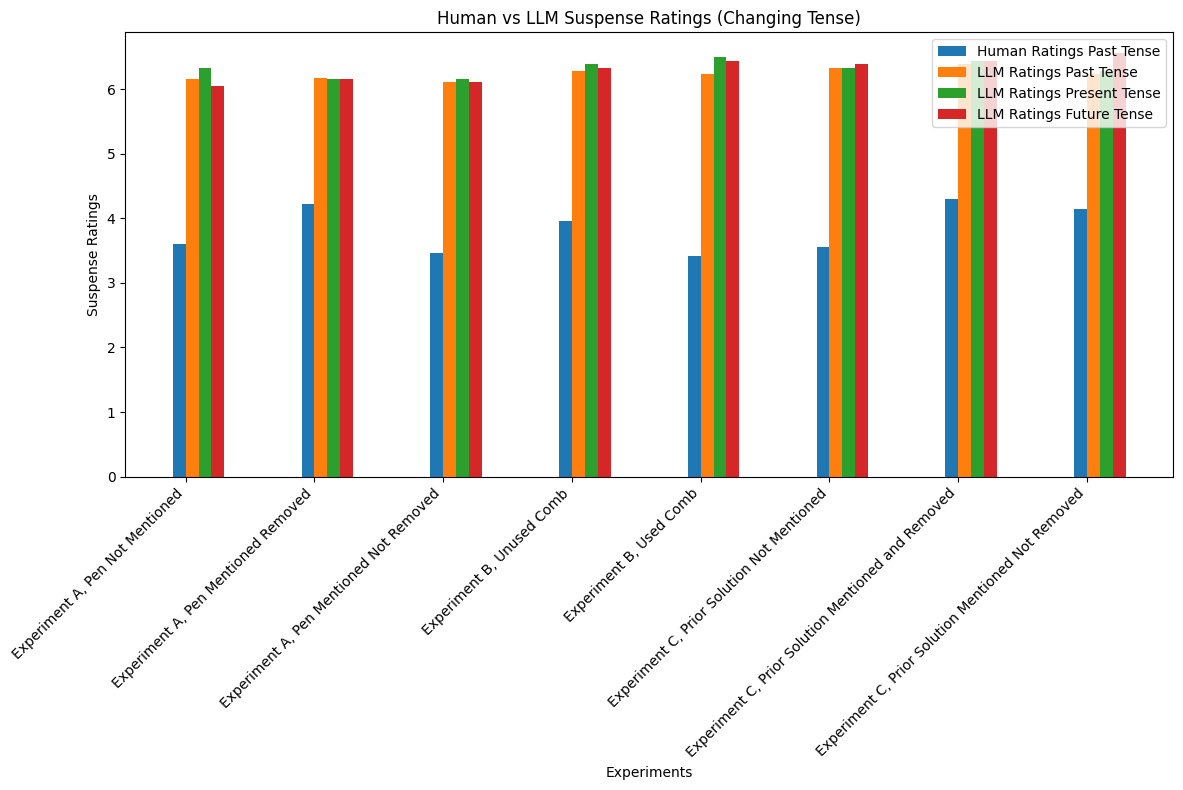

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
experiments = list(human_ratings.keys())
# llm_values = [llm_ratings.get(exp, 0) for exp in experiments]
human_values = [human_ratings.get(exp, 0) for exp in experiments]

# Bar width and index positions
bar_width = 0.1
index = np.arange(len(experiments))

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Bars for human and LLM ratings
bars1 = ax.bar(index, human_values, bar_width, label='Human Ratings Past Tense')
bars2 = ax.bar(index + bar_width, llm_values_past, bar_width, label='LLM Ratings Past Tense')
bars3 = ax.bar(index + (bar_width*2), llm_values_present, bar_width, label='LLM Ratings Present Tense')
bars4 = ax.bar(index + (bar_width*3), llm_values_future, bar_width, label='LLM Ratings Future Tense')

# Labels and title
ax.set_xlabel('Experiments')
ax.set_ylabel('Suspense Ratings')
ax.set_title('Human vs LLM Suspense Ratings (Changing Tense)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(experiments, rotation=45, ha='right', fontsize=10)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

In [27]:
human_ratings_q1 = { # Standard how likely / Q1 ratings
    "Experiment A, Pen Not Mentioned": (6.03 + 5.86) / 2,
    "Experiment A, Pen Mentioned Removed": (5.74 + 5.51) / 2,
    "Experiment A, Pen Mentioned Not Removed": 5.45,
    "Experiment B, Unused Comb": 5.2,
    "Experiment B, Used Comb": 5.24,
    "Experiment C, Prior Solution Not Mentioned": (5.3 + 5.78) / 2,
    "Experiment C, Prior Solution Mentioned and Removed": (5.17 + 5.63) / 2,
    "Experiment C, Prior Solution Mentioned Not Removed": 5.5
}

In [44]:
experiments = list(human_ratings_q1.keys())

llm_rating_sources = ["gerrig_experiment/adverserial_changing_tense/original_past_tense/standard"]
print(llm_rating_sources)
llm_ratings_past = get_llm_ratings(llm_rating_sources, "0")
llm_values_past = [llm_ratings_past.get(exp, 0) for exp in experiments]

llm_rating_sources = ["gerrig_experiment/adverserial_changing_tense/present_tense/standard"]
print(llm_rating_sources)
llm_ratings_present = get_llm_ratings(llm_rating_sources, "0")
llm_values_present = [llm_ratings_present.get(exp, 0) for exp in experiments]

llm_rating_sources = ["gerrig_experiment/adverserial_changing_tense/future_tense/standard"]
print(llm_rating_sources)
llm_ratings_future = get_llm_ratings(llm_rating_sources, "0")
llm_values_future = [llm_ratings_future.get(exp, 0) for exp in experiments]

['gerrig_experiment/adverserial_changing_tense/original_past_tense/standard']
Experiment A, Pen Mentioned Removed rating none
['gerrig_experiment/adverserial_changing_tense/present_tense/standard']
['gerrig_experiment/adverserial_changing_tense/future_tense/standard']


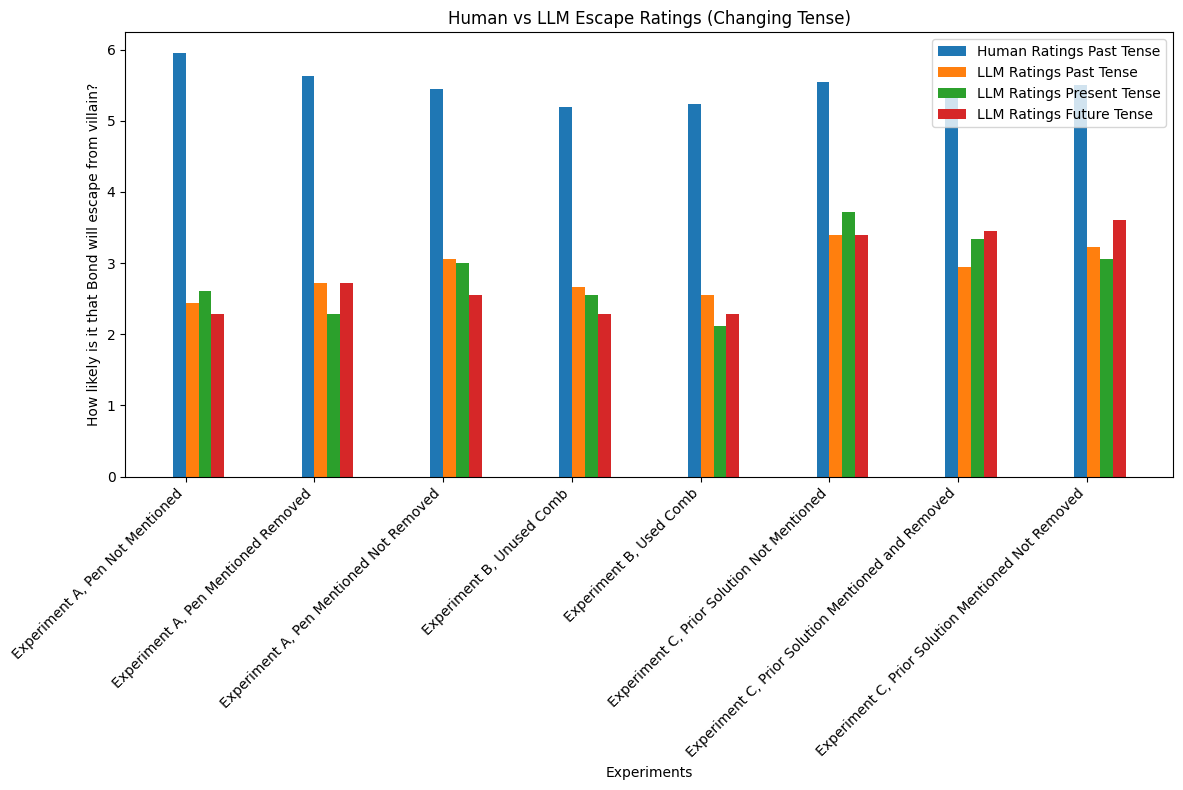

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
experiments = list(human_ratings_q1.keys())
# llm_values = [llm_ratings.get(exp, 0) for exp in experiments]
human_values = [human_ratings_q1.get(exp, 0) for exp in experiments]

# Bar width and index positions
bar_width = 0.1
index = np.arange(len(experiments))

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Bars for human and LLM ratings
bars1 = ax.bar(index, human_values, bar_width, label='Human Ratings Past Tense')
bars2 = ax.bar(index + bar_width, llm_values_past, bar_width, label='LLM Ratings Past Tense')
bars3 = ax.bar(index + (bar_width*2), llm_values_present, bar_width, label='LLM Ratings Present Tense')
bars4 = ax.bar(index + (bar_width*3), llm_values_future, bar_width, label='LLM Ratings Future Tense')

# Labels and title
ax.set_xlabel('Experiments')
ax.set_ylabel('How likely is it that Bond will escape from villain?')
ax.set_title('Human vs LLM Escape Ratings (Changing Tense)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(experiments, rotation=45, ha='right', fontsize=10)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()